In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [2]:
bike = pd.read_csv('./data/train.csv', parse_dates=True, index_col=0)
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [3]:
bike.shape

(10886, 11)

In [4]:
# Check for NaN values in the DataFrame

bike.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Visualizing the Data

(11.5, -0.5)

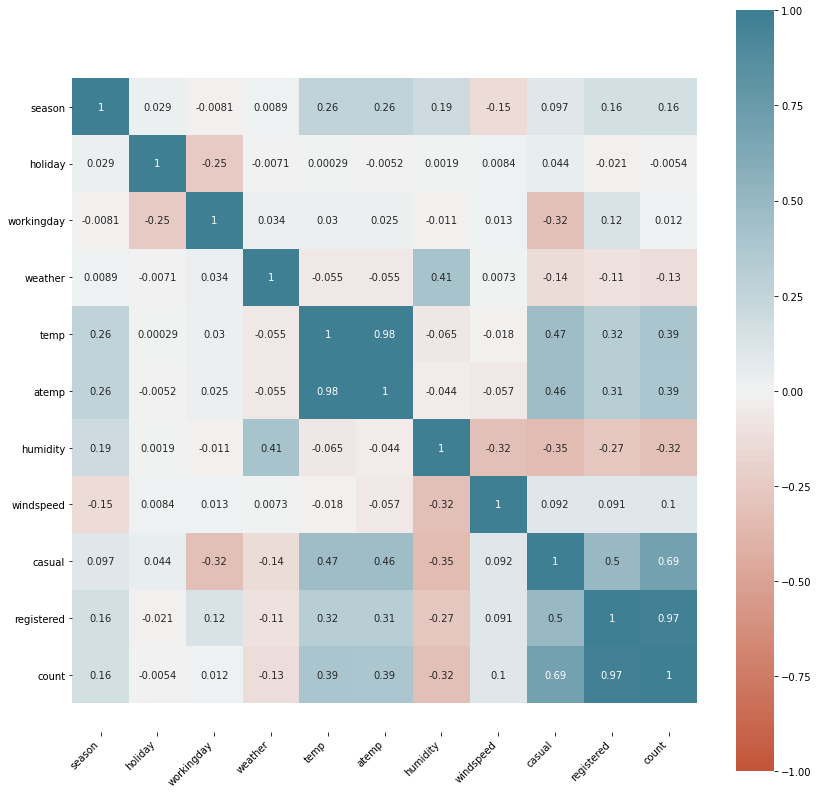

In [6]:
corr = bike.corr()
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5)

In [7]:
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [8]:
bike_workday = bike.groupby('workingday').agg({'casual':'sum','registered': 'sum'})
bike_workday.rename(index={0: 'Non Workday',1: 'Workday'}, inplace=True)

bike_workday

,casual,registered
workingday,,
Non Workday,206037,448835
Workday,186098,1244506


c:\users\biswa_000\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\biswa_000\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


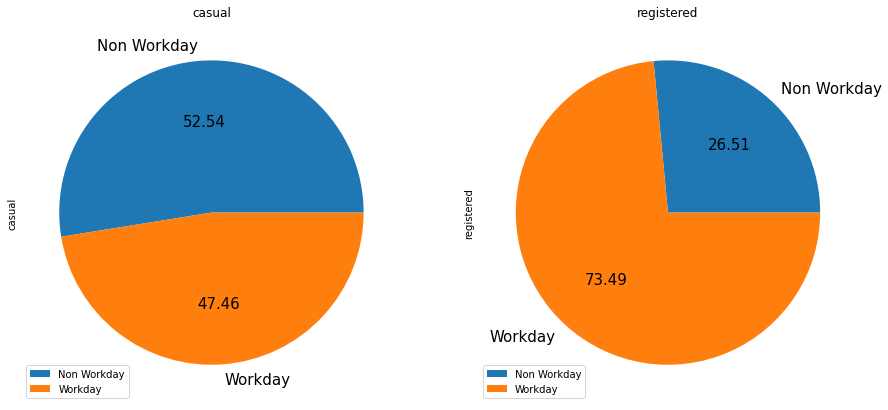

In [9]:
f, axes = plt.subplots(1,2, figsize=(15,10))

for ax, col in zip(axes, bike_workday.columns):
    bike_workday[col].plot(kind='pie', autopct='%.2f', ax=ax, title=col, fontsize=15)
    ax.legend(loc=3)

### Select columns for Feature Matrix (X) and target(y)

In [10]:
X = bike[['atemp']]
y = bike['count']

In [11]:
X

,atemp
datetime,
2011-01-01 00:00:00,14.395
2011-01-01 01:00:00,13.635
2011-01-01 02:00:00,13.635
2011-01-01 03:00:00,14.395
2011-01-01 04:00:00,14.395
...,...
2012-12-19 19:00:00,19.695
2012-12-19 20:00:00,17.425
2012-12-19 21:00:00,15.910


### Splitting data into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
X_train.shape, X_test.shape

((8164, 1), (2722, 1))

### Model - DummyRegressor

In [14]:
from sklearn.dummy import DummyRegressor

In [15]:
# initialize the model
model = DummyRegressor(strategy='median')

# Fit the model on the Training data
model.fit(X_train, y_train)

DummyRegressor(strategy='median')

In [16]:
# Checking the Training score

training_score = model.score(X_train, y_train)
training_score

-0.06737773333098529

In [17]:
# Prediction

y_pred = model.predict(X_test)
y_pred

array([145., 145., 145., ..., 145., 145., 145.])

In [18]:
# Checking the Test data score

test_score = model.score(X_test, y_test)
test_score

-0.06237928063194054

### Kaggle

In [19]:
bike_test = pd.read_csv('./data/test.csv')
bike_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [20]:
bike_test.shape

(6493, 9)

In [21]:
X_bike_test = pd.DataFrame(bike_test['atemp'])
X_bike_test.shape

(6493, 1)

In [22]:
# Prediction

y_pred = model.predict(X_bike_test)
y_pred

array([145., 145., 145., ..., 145., 145., 145.])

In [23]:
output = pd.DataFrame({'datetime': bike_test['datetime'], 'count': y_pred})
output.to_csv('./bike_kaggle_submission/bike_kaggle_submission.csv', index=False)